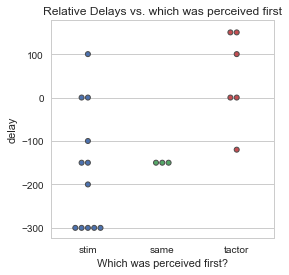

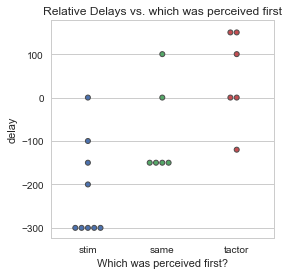

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

delay = np.array([2700,2550,2500,2600,2700,2550,2700,2550,2550,2700,2800,2550,2400,2400,2800,2850,2400,2850,2400,2580,2400
         ])-2700

# felt first
# tactor = 0
# stim = 1 
# same = 2
firstFeel = np.array([1,2,1,1,0,2,0,1,1,1,0,2,1,1,1,0,1,0,1,0,1])

d = {'delay': delay, 'perception': firstFeel}
dataFrameInt = pd.DataFrame(data=d)
map_dict = {0: "tactor",1: "stim",2:"same"}
dataFrameInt["type"] = dataFrameInt["perception"].map(map_dict)
#dataFrameInt = pd.DataFrame(delay,firstFeel)

font = {'size'   : 34}

mpl.rc('font', **font)

plt.figure(figsize=(4,4))
#ax = sns.stripplot(x="type", y="delay", data=dataFrameInt,jitter=True,linewidth=1);
ax = sns.swarmplot(x="type", y="delay", data=dataFrameInt,linewidth=1);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
plt.savefig('TOJ_a1355e_perceptionTimes.png',dpi=600)

######################

firstFeelMoreSame = copy.copy(firstFeel)

# any he said were hard to say but slight edge for stim go to same
firstFeelMoreSame[[8,9,14]] = 2



dSame = {'delay': delay, 'perception': firstFeelMoreSame}
dataFrameIntSame = pd.DataFrame(data=dSame)
map_dict = {0: "tactor",1: "stim",2:"same"}
dataFrameIntSame["type"] = dataFrameIntSame["perception"].map(map_dict)
#dataFrameInt = pd.DataFrame(delay,firstFeel)

font = {'size'   : 34}

mpl.rc('font', **font)

plt.figure(figsize=(4,4))
#ax = sns.stripplot(x="type", y="delay", data=dataFrameInt,jitter=True,linewidth=1);
ax = sns.swarmplot(x="type", y="delay", data=dataFrameIntSame,linewidth=1);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
plt.savefig('TOJ_a1355e_perceptionTimes_moreSame.png',dpi=600)





In [53]:
#####################
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

#from bokeh.charts import BoxPlot, show
#from bokeh.io import push_notebook,show,output_notebook
#from bokeh.layouts import row
#from bokeh.plotting import figure 
#output_notebook()
sns.set_context("poster") # this makes things BIG for the poster 

# use matlab data 
TOJmat = loadmat('a1355e_TOJ_matlab.mat',squeeze_me=1)
epochedButton = TOJmat['epochedButton']
epochedStim = TOJmat['epochedStim']
epochedTactor = TOJmat['epochedTactor']
tactorStimDiff = TOJmat['tactorStimDiff']
responseTimes = TOJmat['responseTimes']
t = TOJmat['t']
epochedTactor = TOJmat['epochedTactor']

map_dict = {0: "tactor",1: "stim",2:"same"}

data = pd.DataFrame({'responseTimes (ms)':1e3*responseTimes,
                     'tactorStimDiff (ms)':-1e3*tactorStimDiff,
                     'firstFelt':firstFeel,
                     'firstFeltSame':firstFeelMoreSame,
                    })

data['firstFeelName'] = data['firstFelt'].map(map_dict)
data['firstFeelNameSame'] = data['firstFeltSame'].map(map_dict)                 




In [54]:
data

,firstFelt,firstFeltSame,responseTimes (ms),tactorStimDiff (ms),firstFeelName,firstFeelNameSame
0,1,1,532.60288,-206.23360,stim,stim
1,2,2,419.55328,-198.86080,same,same
2,1,1,539.44320,-207.05280,stim,stim
3,1,1,NaN,-125.99296,stim,stim
4,0,0,329.19552,13.02528,tactor,tactor
5,2,2,334.31552,-122.83904,same,same
6,0,0,440.72960,9.91232,tactor,tactor
7,1,1,331.57120,-140.98432,stim,stim
8,1,2,275.00544,-138.52672,stim,same
9,1,2,265.42080,24.73984,stim,same


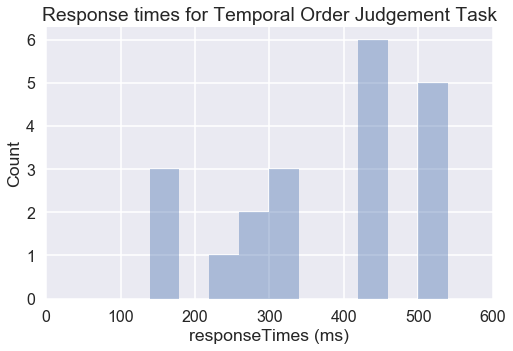

In [55]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data['responseTimes (ms)'].dropna(),bins=10,kde=False);
plt.title('Response times for Temporal Order Judgement Task')
ax.set_ylabel('Count')
ax.set_xlim([0,600])
plt.savefig('TOJ_a1355e_hist.png',dpi=600)


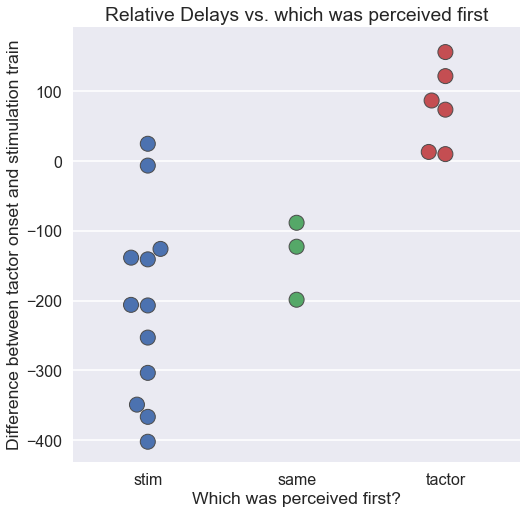

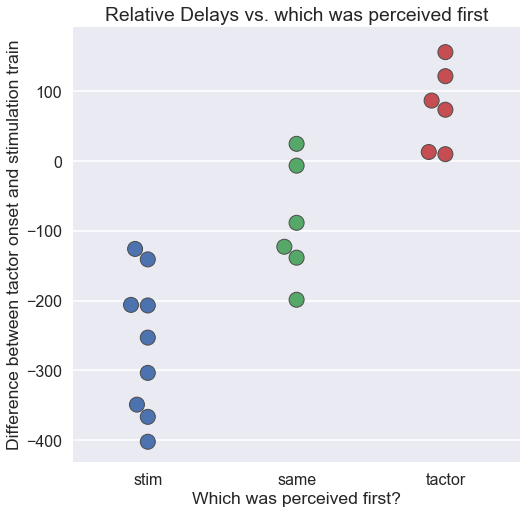

In [65]:
plt.figure(figsize=(8,8))
ax = sns.swarmplot(x="firstFeelName", y="tactorStimDiff (ms)", data=data,linewidth=1,size=15);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
ax.set_ylabel('Difference between tactor onset and stimulation train')
plt.savefig('TOJ_a1355e_perceptionTimes_calculated.png',dpi=600)


plt.figure(figsize=(8,8))
ax = sns.swarmplot(x="firstFeelNameSame", y="tactorStimDiff (ms)", data=data,linewidth=1,size=15);
plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
ax.set_ylabel('Difference between tactor onset and stimulation train')
plt.savefig('TOJ_a1355e_perceptionTimes_calculated_Same.png',dpi=600)




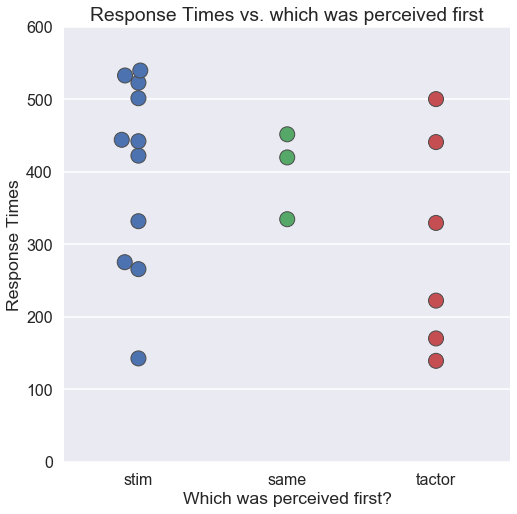

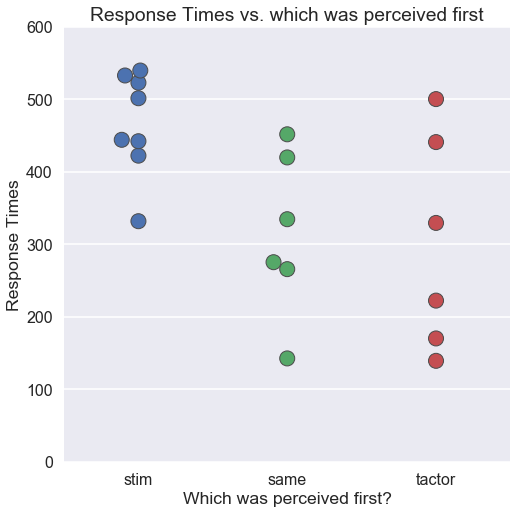

In [68]:
plt.figure(figsize=(8,8))
ax = sns.swarmplot(x="firstFeelName", y="responseTimes (ms)", data=data,linewidth=1,size=15);
plt.title('Response Times vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
ax.set_ylabel('Response Times')
ax.set_ylim([0,600])
plt.savefig('TOJ_a1355e_responseTimes_calculated.png',dpi=600)


plt.figure(figsize=(8,8))
ax = sns.swarmplot(x="firstFeelNameSame", y="responseTimes (ms)", data=data,linewidth=1,size=15);
plt.title('Response Times vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
ax.set_ylabel('Response Times')
ax.set_ylim([0,600])
plt.savefig('TOJ_a1355e_responseTimes_calculated_Same.png',dpi=600)



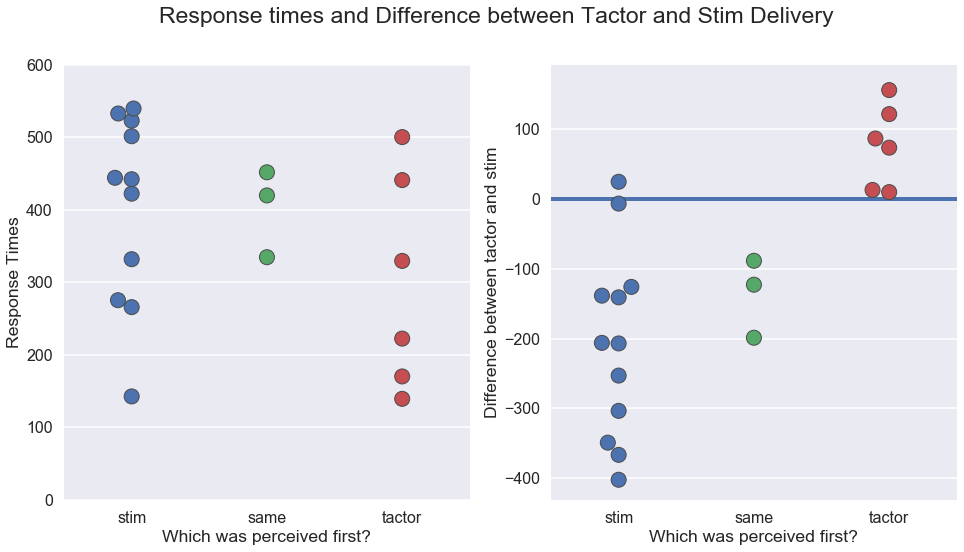

In [103]:
fig, ax = plt.subplots(1, 2,figsize=(16,8))
sns.swarmplot(x="firstFeelName", y="responseTimes (ms)", data=data,linewidth=1,size=15,ax=ax[0]);
ax[0].set_xlabel('Which was perceived first?')
ax[0].set_ylabel('Response Times')
ax[0].set_ylim([0,600])

sns.swarmplot(x="firstFeelName", y="tactorStimDiff (ms)", data=data,linewidth=1,size=15,ax=ax[1]);
ax[1].set_xlabel('Which was perceived first?')
ax[1].set_ylabel('Difference between tactor and stim')
ax[1].axhline(y=0,linewidth=4)
plt.suptitle('Response times and Difference between Tactor and Stim Delivery')
plt.savefig('TOJ_a1355e_both_calculated.png',dpi=600)

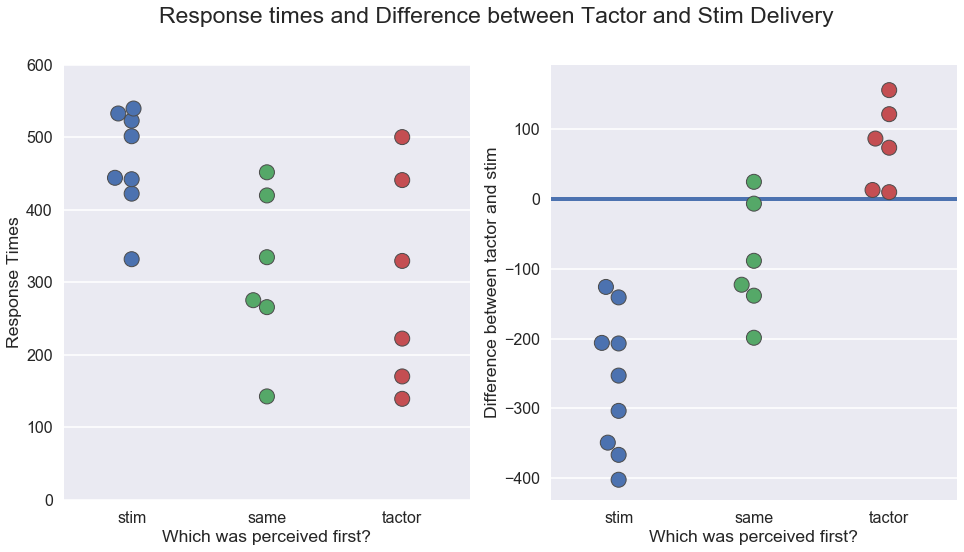

In [104]:
fig, ax = plt.subplots(1, 2,figsize=(16,8))
sns.swarmplot(x="firstFeelNameSame", y="responseTimes (ms)", data=data,linewidth=1,size=15,ax=ax[0]);
ax[0].set_xlabel('Which was perceived first?')
ax[0].set_ylabel('Response Times')
ax[0].set_ylim([0,600])

sns.swarmplot(x="firstFeelNameSame", y="tactorStimDiff (ms)", data=data,linewidth=1,size=15,ax=ax[1]);
ax[1].set_xlabel('Which was perceived first?')
ax[1].set_ylabel('Difference between tactor and stim')
ax[1].axhline(y=0,linewidth=4)
plt.suptitle('Response times and Difference between Tactor and Stim Delivery')
plt.savefig('TOJ_a1355e_both_calculatedSame.png',dpi=600)

In [137]:
dfGroup = data.groupby(['firstFeelNameSame']).describe()
dfGroup[['tactorStimDiff (ms)','responseTimes (ms)']]

tactorStimDiff (ms)                                    \
                                count        mean        std        min   
firstFeelNameSame                                                         
same                              6.0  -88.425813  84.142486 -198.86080   
stim                              9.0 -261.738951  99.637215 -402.47296   
tactor                            6.0   76.881920  58.269892    9.91232   

                                                               \
                         25%        50%        75%        max   
firstFeelNameSame                                               
same              -134.60480 -105.67680  -27.04384   24.73984   
stim              -349.26592 -253.13280 -206.23360 -125.99296   
tactor              28.18048   80.19968  112.98816  156.22144   

                  responseTimes (ms)                                     \
                               count        mean         std        min   
firstFeelNameSame                                                         
same                             6.0  314.668373  112.981653  142.25408   
stim                             8.0  466.913280   71.061928  331.57120   
tactor                           6.0  300.120747  148.084290  138.93632   

                                                               
                         25%        50%        75%        max  
firstFeelNameSame                                              
same               267.81696  304.66048  398.24384  451.46112  
stim               436.94080  472.55552  525.13792  539.44320  
tactor             182.86592  275.59936  412.84608  500.03968

In [142]:
tactor

Series([], Name: responseTimes (ms), dtype: float64)

In [145]:
#sub1_tact = dataCleaned[experiment["tactor"]][Subject["1"]]
stim = data[(data.firstFeelNameSame =='stim')]['responseTimes (ms)'].dropna()
tactor = data[(data.firstFeelNameSame =='tactor')]['responseTimes (ms)'].dropna()
same = data[(data.firstFeelNameSame =='same')]['responseTimes (ms)'].dropna()
scipy.stats.kruskal(stim,same,tactor)


KruskalResult(statistic=7.7523809523809462, pvalue=0.020729645029649819)

In [224]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dataStats = data['responseTimes (ms)'].dropna()
groupsStats = data['firstFeelNameSame'].loc[data['responseTimes (ms)']!=np.nan]
goodInds = data['responseTimes (ms)'].dropna().index.values
goodInds = goodInds.tolist()
groupsStats = groupsStats.iloc[goodInds]


tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level


tukey.summary()


group1,group2,meandiff,lower,upper,reject
same,stim,152.2449,-1.2653,305.7551,False
same,tactor,-14.5476,-178.657,149.5617,False
stim,tactor,-166.7925,-320.3028,-13.2823,True


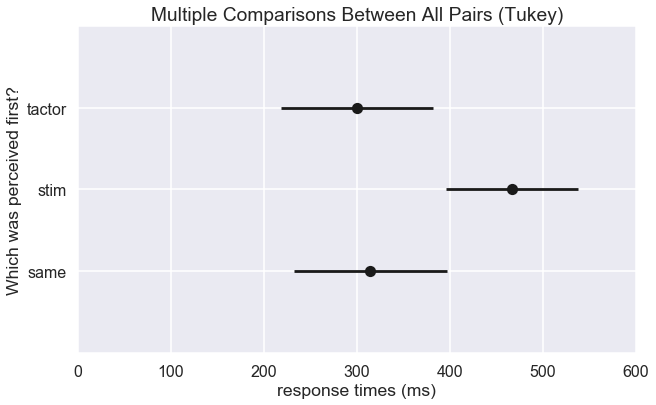

In [238]:
fig,ax = plt.subplots(1)
tukey.plot_simultaneous(ax=ax)    # Plot group confidence intervals
ax.set_xlabel('response times (ms)')
ax.set_ylabel('Which was perceived first?')
ax.set_xlim([0,600])
plt.savefig('TOJ_tukeySame.png',dpi=600)